In [1]:
from nilearn import plotting, datasets
import matplotlib.pyplot as plt
import pickle
import numpy as np
from esfMRI import sliceWindows

In [2]:
with open("FCs.pkl", "rb") as f:
    fcs = pickle.load(f)

In [19]:
subid = "sub-292"
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']
fc = fcs[subid]["ses-preop"]["run-01"].copy()

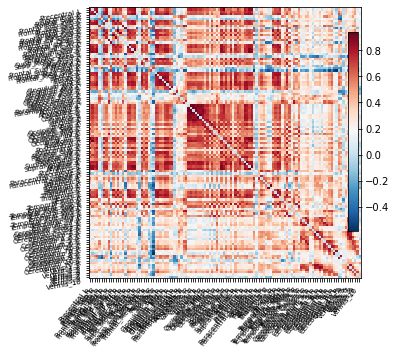

In [6]:
np.fill_diagonal(fc, 0)
fc_display = plotting.plot_matrix(fc, labels=atlas_labels, colorbar=True)
fig_fc, ax_fc = fc_display.figure, fc_display.axes
fig_fc.patch.set_color("white")
fig_fc.savefig("test.png")

In [ ]:
coords = plotting.find_parcellation_cut_coords(atlas["maps"])

In [25]:
plotting.plot_connectome(fc, coords, node_size=25, edge_threshold=0.8, output_file="connectome.png")

In [28]:
with open("states_pkl/total/cluster/km_60s_3states.pkl", "rb") as f:
    km = pickle.load(f)

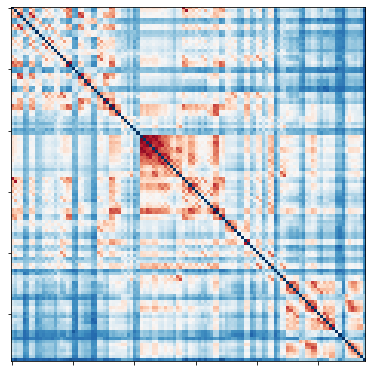

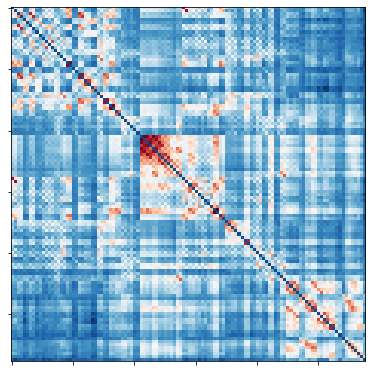

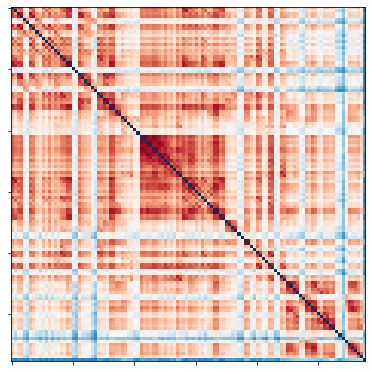

In [32]:
for i, state in enumerate(km.cluster_centers_):
    fc = state.reshape((116, 116))
    np.fill_diagonal(fc, 0)
    fc_display = plotting.plot_matrix(fc, colorbar=False)
    fig_fc, ax_fc = fc_display.figure, fc_display.axes
    fig_fc.patch.set_color("white")
    fig_fc.savefig(f"states/total/3states/60/state_{i}.png")